In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import expit, logit
from econml.dml import LinearDML, CausalForestDML
from lightgbm import LGBMRegressor, LGBMClassifier
from ortools.linear_solver import pywraplp

# Data generating process

In [3]:
def data_generator(tau_weight, interaction_num):
    
    # Set number of observations
    n=10000

    # Set number of features
    p=10

    # Create features
    X = np.random.uniform(size=n * p).reshape((n, -1))

    # Nuisance parameters
    b = (
        np.sin(np.pi * X[:, 0] * X[:, 1])
        + 2 * (X[:, 2] - 0.5) ** 2
        + X[:, 3]
        + 0.5 * X[:, 4]
        + X[:, 5] * X[:, 6]
        + X[:, 7] ** 3
        + np.sin(np.pi * X[:, 8] * X[:, 9])
    )

    # Create binary treatment
    T = np.random.binomial(1, expit(b))

    # treatment interactions
    interaction_1 = X[:, 0] * X[:, 1] + X[:, 2]
    interaction_2 = X[:, 3] * X[:, 4] + X[:, 5]
    interaction_3 = X[:, 6] * X[:, 7] + X[:, 9]

    # Set treatment effect
    if interaction_num==1:
        tau = tau_weight * interaction_1
    elif interaction_num==2:
        tau = tau_weight * interaction_2
    elif interaction_num==3:
        tau = tau_weight * interaction_3

    # Calculate outcome
    y = b + T * tau + np.random.normal(size=n)
    
    return X, T, tau, y

In [4]:
np.random.seed(123)

# Generate samples for 3 different treatments
X1, T1, tau1, y1 = data_generator(0.75, 1)
X2, T2, tau2, y2 = data_generator(0.50, 2)
X3, T3, tau3, y3 = data_generator(0.90, 3)

# Estimating CATE with DML

In [57]:
np.random.seed(123)

# Train DML model using flexible stage 1 models
dml1 = LinearDML(model_y=LGBMRegressor(), model_t=LGBMClassifier(), discrete_treatment=True)
dml1.fit(y1, T=T1, X=X1, W=None)

# Train DML model using flexible stage 1 models
dml2 = LinearDML(model_y=LGBMRegressor(), model_t=LGBMClassifier(), discrete_treatment=True)
dml2.fit(y2, T=T2, X=X2, W=None)

# Train DML model using flexible stage 1 models
dml3 = LinearDML(model_y=LGBMRegressor(), model_t=LGBMClassifier(), discrete_treatment=True)
dml3.fit(y3, T=T3, X=X3, W=None)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[LightGBM] [Info] Number of positive: 4523, number of negative: 477
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 5000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.904600 -> initscore=2.249414
[LightGBM] [Info] Start training from score 2.249414
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002570 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 28050
[LightGBM] [Info] Number of data points in the train set: 5000, number of used features: 110
[LightGBM] [Info] Start training from score 2.982379
[LightGBM] [Info] Number of positive: 4523, number of negative: 477
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000178 second

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[LightGBM] [Info] Number of positive: 4542, number of negative: 458
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 5000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.908400 -> initscore=2.294254
[LightGBM] [Info] Start training from score 2.294254
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002983 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 28050
[LightGBM] [Info] Number of data points in the train set: 5000, number of used features: 110
[LightGBM] [Info] Start training from score 2.843978
[LightGBM] [Info] Number of positive: 4543, number of negative: 457
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000186 second

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


[LightGBM] [Info] Number of positive: 4525, number of negative: 475
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 5000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.905000 -> initscore=2.254058
[LightGBM] [Info] Start training from score 2.254058
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 28050
[LightGBM] [Info] Number of data points in the train set: 5000, number of used features: 110
[LightGBM] [Info] Start training from score 3.089546
[LightGBM] [Info] Number of positive: 4526, number of negative: 474
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000260 second

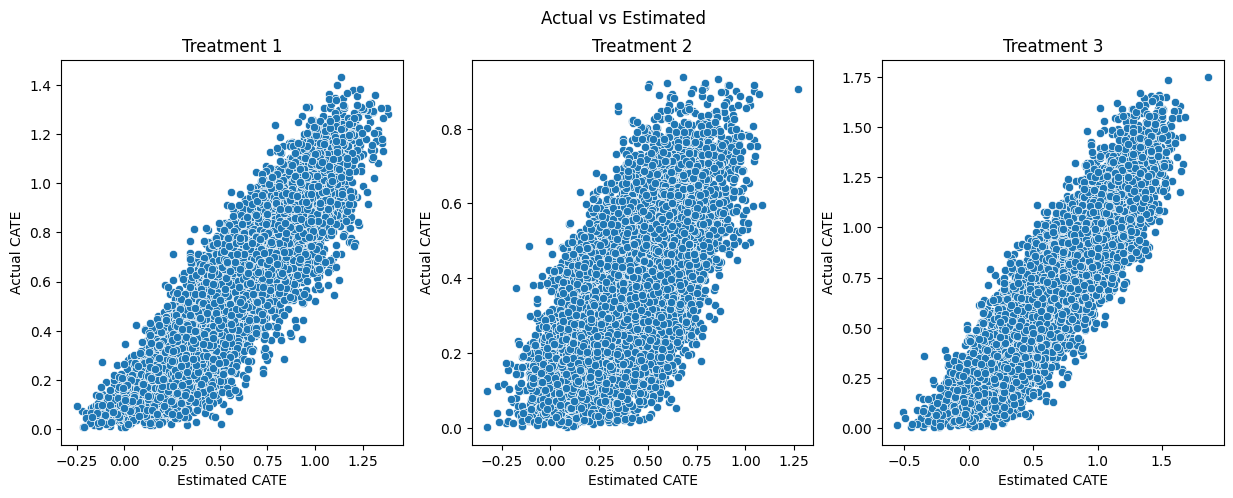

In [56]:
# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot scatter plots on each subplot
sns.scatterplot(x=dml1.effect(X1), y=tau1, ax=axes[0])
axes[0].set_title('Treatment 1')
axes[0].set_xlabel('Estimated CATE')
axes[0].set_ylabel('Actual CATE')

sns.scatterplot(x=dml2.effect(X2), y=tau2, ax=axes[1])
axes[1].set_title('Treatment 2')
axes[1].set_xlabel('Estimated CATE')
axes[1].set_ylabel('Actual CATE')

sns.scatterplot(x=dml3.effect(X3), y=tau3, ax=axes[2])
axes[2].set_title('Treatment 3')
axes[2].set_xlabel('Estimated CATE')
axes[2].set_ylabel('Actual CATE')

# Add labels to the entire figure
fig.suptitle('Actual vs Estimated')

# Show plots
plt.show()

# Naive optimisation

In [40]:
# Create mapping for cost of each treatment
cost_dict = {'T1': 0.1, 'T2': 0.2, 'T3': 0.3}

# Set constraints
max_cost = 3000

In [39]:
# Concatenate features
X = np.concatenate((X1, X2, X3), axis=0)

# Estimate CATE for each treatment using DML models
Treatment_1 = dml1.effect(X)
Treatment_2 = dml2.effect(X)
Treatment_3 = dml3.effect(X)
cate = pd.DataFrame({"T1": Treatment_1, "T2": Treatment_2, "T3": Treatment_3})

# Select the best treatment for each customer
best_treatment = cate.idxmax(axis=1)
best_value = cate.max(axis=1)

# Map cost for each treatment
best_cost = pd.Series([cost_dict[value] for value in best_treatment])

# Create dataframe with each customers best treatment and associated cost
best_df = pd.concat([best_value, best_cost], axis=1)
best_df.columns = ["value", "cost"]
best_df = best_df.sort_values(by=['value'], ascending=False).reset_index(drop=True)

# Naive optimisation
best_df_cum = best_df.cumsum()
opt_index = best_df_cum['cost'].searchsorted(max_cost)
naive_order_value = round(best_df_cum.iloc[opt_index]['value'], 0)
naive_cost_check = round(best_df_cum.iloc[opt_index]['cost'], 0)

print(f'The total order value from the naive treatment strategy is {naive_order_value} with a cost of {naive_cost_check}')

The total order value from the naive treatment strategy is 13613.0 with a cost of 3000.0


# Optimising treatment strategies with linear programming

In [14]:
# Cost mapping for all treatments
cost_mapping = {'T1': [cost_dict["T1"]] * 30000,
                'T2': [cost_dict["T2"]] * 30000,
                'T3': [cost_dict["T3"]] * 30000}

# Create DataFrame
df_costs = pd.DataFrame(cost_mapping)
df_costs

,T1,T2,T3
0,0.1,0.2,0.3
1,0.1,0.2,0.3
2,0.1,0.2,0.3
3,0.1,0.2,0.3
4,0.1,0.2,0.3
...,...,...,...
29995,0.1,0.2,0.3
29996,0.1,0.2,0.3
29997,0.1,0.2,0.3
29998,0.1,0.2,0.3


In [32]:
solver = pywraplp.Solver.CreateSolver('SCIP')

# Set constraints
max_cost = 3000
min_cost = 3000

# Create input arrays
costs = df_costs.to_numpy()
order_value = cate.to_numpy()

num_custs = len(costs)
num_treatments = len(costs[0])

# x[i, j] is an array of 0-1 variables, which will be 1 if customer i is assigned to treatment j.
x = {}
for i in range(num_custs):
    for j in range(num_treatments):
        x[i, j] = solver.IntVar(0, 1, '')
    
# Each customer is assigned to at most 1 treatment.
for i in range(num_custs):
    solver.Add(solver.Sum([x[i, j] for j in range(num_treatments)]) <= 1)

# Cost constraints
solver.Add(sum([costs[i][j] * x[i, j] for j in range(num_treatments) for i in range(num_custs)]) <= max_cost)
solver.Add(sum([costs[i][j] * x[i, j] for j in range(num_treatments) for i in range(num_custs)]) >= min_cost)

# Objective
objective_terms = []
for i in range(num_custs):
    for j in range(num_treatments):
        objective_terms.append((order_value[i][j] * x[i, j] - costs[i][j] * x[i, j] ))
solver.Maximize(solver.Sum(objective_terms))

# Solve
status = solver.Solve()

assignments = []
values = []

if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
    for i in range(num_custs):
        for j in range(num_treatments):
            # Test if x[i,j] is 1 (with tolerance for floating point arithmetic).
            if x[i, j].solution_value() > -0.5:
                assignments.append([i, j])
                values.append([x[i, j].solution_value(), costs[i][j] * x[i, j].solution_value(), order_value[i][j]])

# Create a DataFrame from the collected data
df = pd.DataFrame(assignments, columns=['customer', 'treatment'])
df['assigned'] = [x[0] for x in values]
df['cost'] = [x[1] for x in values]
df['order_value'] = [x[2] for x in values]

df

,customer,treatment,assigned,cost,order_value
0,0,0,1.0,0.1,0.382199
1,0,1,0.0,0.0,0.363752
2,0,2,0.0,0.0,0.820419
3,1,0,1.0,0.1,0.484866
4,1,1,0.0,0.0,0.279752
...,...,...,...,...,...
89995,29998,1,0.0,0.0,0.378684
89996,29998,2,0.0,0.0,0.242136
89997,29999,0,1.0,0.1,0.584779
89998,29999,1,0.0,0.0,0.569503


In [33]:
opt_order_value = round(df['order_value'][df['assigned'] == 1].sum(), 0)
opt_cost_check = round(df['cost'][df['assigned'] == 1].sum(), 0)

print(f'The total order value from the optimised treatment strategy is {opt_order_value} with a cost of {opt_cost_check}')

The total order value from the optimised treatment strategy is 18546.0 with a cost of 3000.0


|T|Treatment|
|-|-|
|1|10% discount|
|2|20% discount|
|3|50% discount|

$$
\textbf{Decision Variables:} \\
x_{ij} = \begin{cases} 
1 & \text{if agent } i \text{ is assigned task } j \\
0 & \text{otherwise}
\end{cases}
$$

$$
\textbf{Objective Function:} \\
\text{Maximize: } \sum_{i} \sum_{j} \text{order\_value}_{ij} - \text{cost}_{ij}
$$

$$
\textbf{Constraints:} \\
\text{Constraint 1:} \quad \sum_{j} x_{ij} \leq 1 \quad \forall i \\
\text{Constraint 2:} \quad \sum_{i} \sum_{j} \text{cost}_{ij} \geq 10000 \\
\text{Constraint 3:} \quad \sum_{i} \sum_{j} \text{cost}_{ij} \leq 100000
$$

\begin{equation}
Y_i = \alpha + \beta T_i + \sum_{k=1}^{K} \delta_k X_{ik} T_i + \epsilon_i
\end{equation}